# 물리학실험 2-1. 등전위선 실험
* Image size: 380 mm x 240 mm
* 원형 전극 지름 : 1.5cm
* 도체 지름 : 5.34cm

## 수학적 분석
* (+)와 (-)극의 전극으로 전위차를 만들어주는 것은 쌍극자와 유사.
* 전위차
$$V=V_0+V_1\ln{\left(r_+/a\right)}-V_0-V_1\ln{\left(r_+/a\right)}=V_1\ln{\left(r_+/r_-\right)}=\frac{1}{2}V_1\ln{\left(\frac{\left(x-a\right)^2+y^2}{\left(x+a\right)^2+y^2}\right)}$$
$$\Delta V=V\left(a-r_0\right)=V_1\ln{\frac{r_0}{2a-r_0}} = -3.245V_1$$

$$V_1 = -0.3082\Delta V $$

따라서

$$ \frac{(x-a)^2 + y^2}{(x+a)^2 + y^2}  = e^{2V/V_1} = e^{V/(-0.1541\Delta V)} := A$$

(a, 0)와의 거리 : (-a, 0)와의 거리 = $\sqrt{A}:1$

원의 두 꼭짓점 : $\frac{1-\sqrt{A}}{\sqrt{A}+1}a$, $\frac{1+\sqrt{A}}{\sqrt{A} - 1}a$
* $r_0 = $ 0.75 cm, $a = $ 10 cm 

## 이론값 계산

In [1]:
import math
import numpy as np
r0 =0.75 # cm
a = 10 # cm
1/(2*math.log(r0/(2*a-r0)))

-0.15407403488161142

In [2]:
def circle(deltaV, V):
    if V == 0:
        return 0, 10000
    a = 10
    A = math.exp(-V/0.1541 / deltaV)
    sA = math.sqrt(A)
    right = (1+sA)/(1-sA) * a
    left = (1-sA)/(1+sA) * a
    center = (left + right) / 2
    radius = (right - left) / 2
    return left, right
    
circle(1.12, -0.2)

(-2.818591898907999, -35.47870837163151)

In [3]:
# 기준전압, 전압 간격
experiments = [(1.13, 0.5), (1.45, 0.5), (1.79, 0.5), (2.14, 0.5), (2.49, 0.5)]
intercepts = []

epsilon = 0.01
for deltaV, Vsep in experiments:
    result = []
    n = int(deltaV / Vsep)
    voltages = np.arange(-n * Vsep, n * Vsep + epsilon, Vsep)
    for v in voltages:
        result.append((v, circle(deltaV, v)[0]))
    intercepts.append(result)


print(intercepts)

[[(-1.0, -8.92825583045587), (-0.5, -6.155708762023911), (0.0, 0), (0.5, 6.155708762023911), (1.0, 8.92825583045587)], [(-1.0, -8.07166294541171), (-0.5, -5.075482926283103), (0.0, 0), (0.5, 5.075482926283103), (1.0, 8.071662945411708)], [(-1.5, -8.762744228947707), (-1.0, -7.193640735716242), (-0.5, -4.244954360485323), (0.0, 0), (0.5, 4.244954360485324), (1.0, 7.193640735716244), (1.5, 8.762744228947707)], [(-2.0, -9.080313698640015), (-1.5, -8.134496152783562), (-1.0, -6.399534700366227), (-0.5, -3.618799626646112), (0.0, 0), (0.5, 3.618799626646112), (1.0, 6.399534700366227), (1.5, 8.134496152783562), (2.0, 9.080313698640015)], [(-2.0, -8.625116006225689), (-1.5, -7.518960715275007), (-1.0, -5.7270268564684805), (-0.5, -3.1471275994925034), (0.0, 0), (0.5, 3.1471275994925034), (1.0, 5.727026856468481), (1.5, 7.518960715275006), (2.0, 8.625116006225689)]]


In [4]:
f = open("theoretical.txt", "w")

for i in range(len(intercepts)):
    f.write(f"Experiment {i+1}: Delta V = {experiments[i][0]}, V sep = {experiments[i][1]}\n")
    for (voltage, x) in intercepts[i]:
        f.write(f"{voltage}\t{x * 10}\n") # x in mm
f.close()

## 실제 측정결과($x$-절편)

In [5]:
results = [
    [(-0.5, -60.55), (0, 0), (0.5, 61.46)],
    [(-1., -80.69), (-0.5, -48.14), (0, 0), (0.5, 49.63), (1., 80.66)],
    [(-1., -71.06), (-0.5, -39.85), (0, 0), (0.5, 41.66), (1., 71.11)],
    [(-1.5, -82.65), (-1., -61.1), (-0.5, -33.75), (0, 0), (0.5, 35.04), (1., 63.74), (1.5, 82.52)],
    [(-0.5, -28.86), (0, 0), (0.5, 30.46), (1., 56.8)]
            ]



## 그래프 그리기



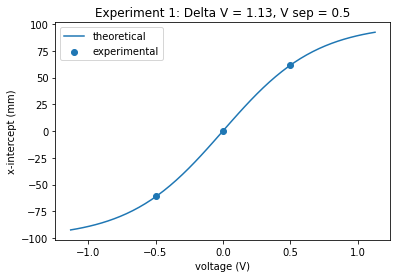

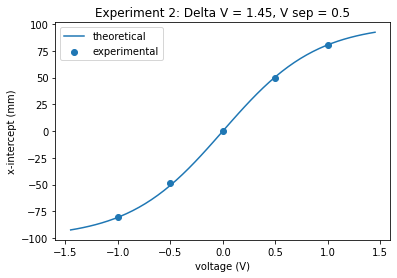

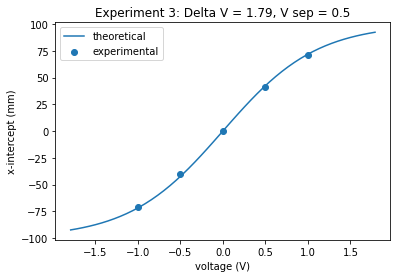

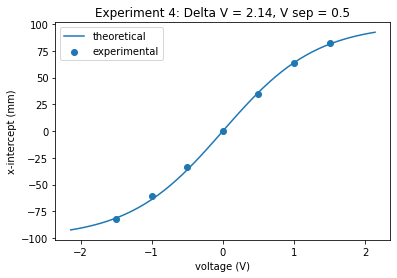

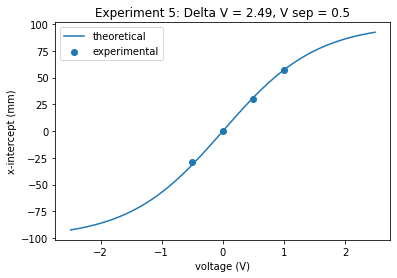

In [6]:
import matplotlib.pyplot as plt
n = len(results) # number of experiments, 5
for i in range(0, n):
    plt.figure(i+1)
    x = [coord[0] for coord in results[i]]
    y = [coord[1] for coord in results[i]]
    plt.scatter(x, y, label="experimental")
    theor_x = np.linspace(-experiments[i][0], experiments[i][0], 50)
    theor_y = 10 *np.array([circle(experiments[i][0], x)[0] for x in theor_x])
    plt.plot(theor_x, theor_y, label="theoretical")
    plt.title(f"Experiment {i+1}: Delta V = {experiments[i][0]}, V sep = {experiments[i][1]}")
    plt.xlabel("voltage (V)")
    plt.ylabel("x-intercept (mm)")
    plt.legend()
    plt.savefig(f'exp{i+1}.png', dpi=300)
    plt.show()
    

